In [43]:
from fredapi import Fred
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from darts import TimeSeries

In [2]:
fred = Fred(api_key="8ede227d95e33c5cdf2ea8a83577bc0a")

In [48]:
fred_series_ids = ["IHLIDXNSAGB", "IRLTLT01GBM156N", "QGBN628BIS", "UKNGDP", "GBRCPIALLMINMEI"]

In [49]:
fred_series_metadata = []
fred_series_list = []
for series in fred_series_ids:
    metadata = fred.get_series_info(series)
    series = fred.get_series(series).rename(metadata["title"])
    fred_series_metadata.append(metadata)
    fred_series_list.append(series)

In [51]:
fred_series_metadata

[id                                                                 IHLIDXNSAGB
 realtime_start                                                      2025-03-26
 realtime_end                                                        2025-03-26
 title                             Job Postings on Indeed in the United Kingdom
 observation_start                                                   2020-02-01
 observation_end                                                     2025-03-21
 frequency                                                         Daily, 7-Day
 frequency_short                                                              D
 units                                                    Index Feb, 1 2020=100
 units_short                                              Index Feb, 1 2020=100
 seasonal_adjustment                                    Not Seasonally Adjusted
 seasonal_adjustment_short                                                  NSA
 last_updated                           

In [52]:
economic_uncertainty = pd.read_csv("../data/USEPUINDXD.csv", parse_dates=["observation_date"], index_col="observation_date").squeeze()

In [53]:
data = fred_series_list.copy()
data.append(economic_uncertainty)

In [54]:
data_ts = [TimeSeries.from_series(series) for series in data]

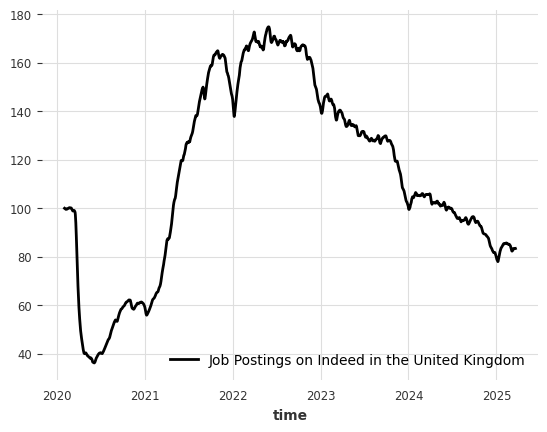

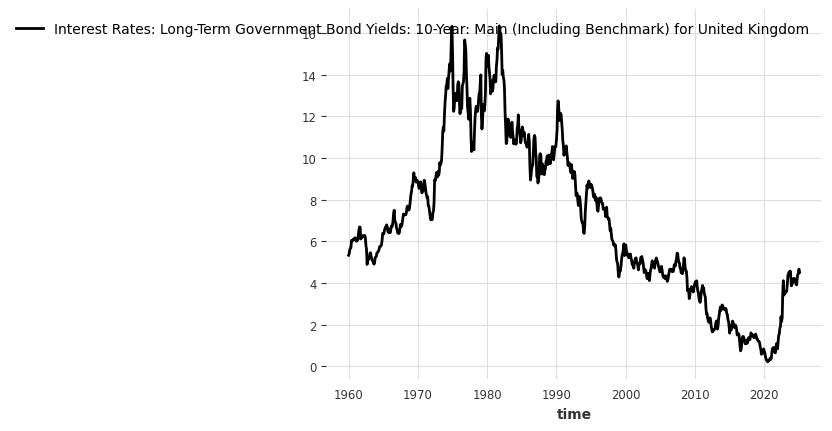

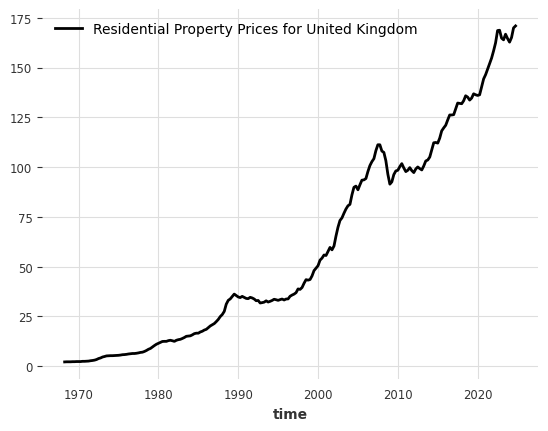

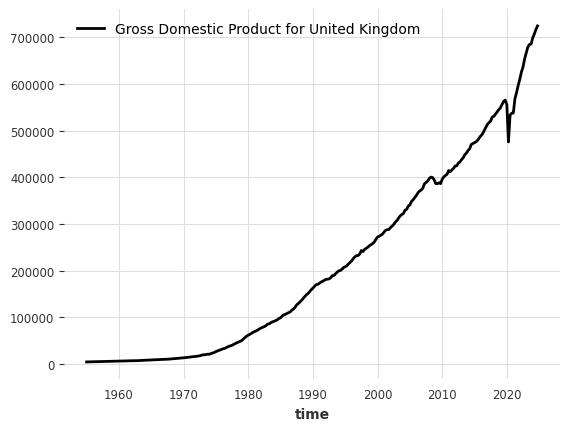

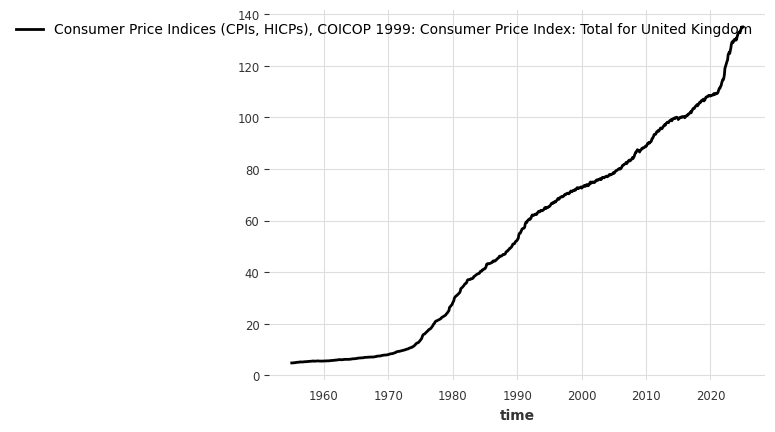

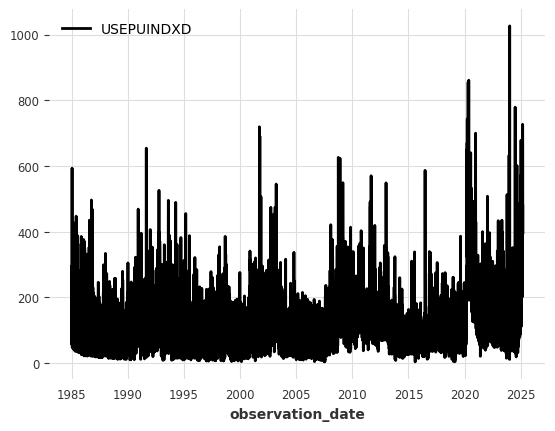

In [55]:
for ts in data_ts:
    ts.plot()
    plt.show()